In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
np.random.seed(42)

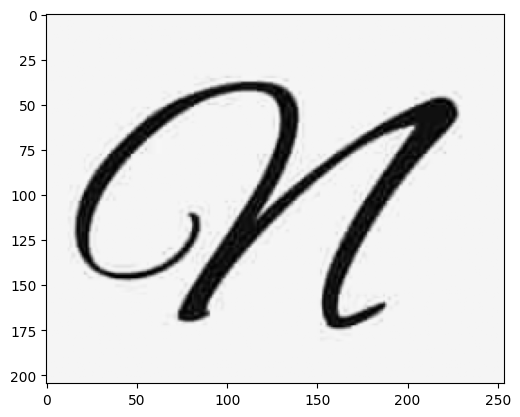

In [90]:
image = cv2.imread('C:/Users/Aravind/try/cat/image.png', cv2.IMREAD_GRAYSCALE)
original_img = plt.imread('C:/Users/Aravind/try/cat/image.png')
plt.imshow(original_img)

In [91]:
original_img.shape

(205, 254, 4)

In [92]:
image

array([[245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       ...,
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245]], dtype=uint8)

In [93]:
sampled_image = original_img[::2, ::2]

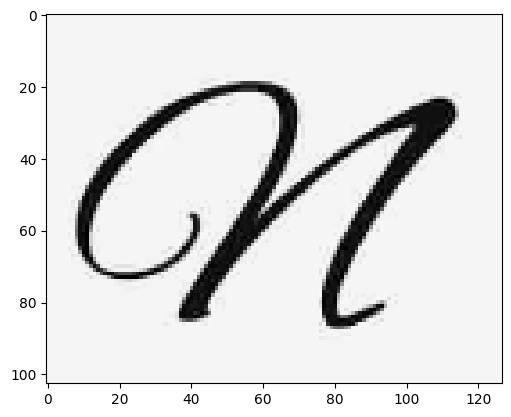

In [94]:
plt.imshow(sampled_image)

In [95]:
sampled_image.shape

(103, 127, 4)

In [96]:
quantization_levels = 2 
quantized_image = cv2.convertScaleAbs(original_img, alpha=(256 / quantization_levels), beta=0)

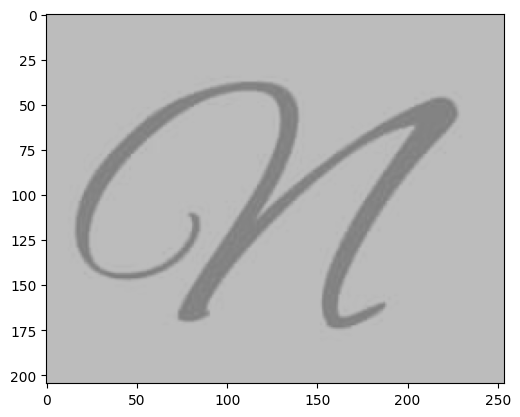

In [97]:
plt.imshow(quantized_image)

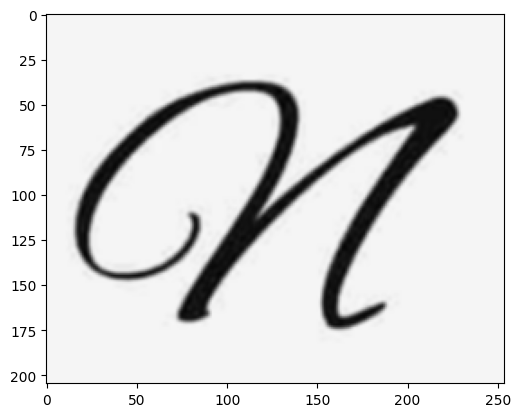

In [98]:
def apply_average_filter(image):
    kernel = np.ones((3, 3), np.float32) / 9
    filtered_image = cv2.filter2D(image, -1, kernel)

    return filtered_image

output_image = apply_average_filter(original_img)
plt.imshow(output_image)




In [99]:
from PIL import Image, ImageDraw, ImageFont
import os

dataset_dir = "handwritten_alphabets"
os.makedirs(dataset_dir, exist_ok=True)


for letter in range(65, 91):  
    letter_folder = os.path.join(dataset_dir, chr(letter))
    os.makedirs(letter_folder, exist_ok=True)

    img = Image.new("RGB", (64, 64), "white")
    draw = ImageDraw.Draw(img)

    font = ImageFont.load_default()

    text_width, text_height = draw.textsize(chr(letter), font)
    x = (img.width - text_width) // 2
    y = (img.height - text_height) // 2

    draw.text((x, y), chr(letter), font=font, fill="black")

    img.save(os.path.join(letter_folder, f"{chr(letter)}.png"))

print("Dataset generation complete.")


Dataset generation complete.


In [100]:
import tensorflow as tf

image_directory = "C:/Users/Aravind/try/cat/handwritten_alphabets"

dataset = tf.keras.utils.image_dataset_from_directory(
    image_directory,
    labels="inferred",
    label_mode="categorical",
    image_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42
)


Found 26 files belonging to 26 classes.


In [101]:
dataset.class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

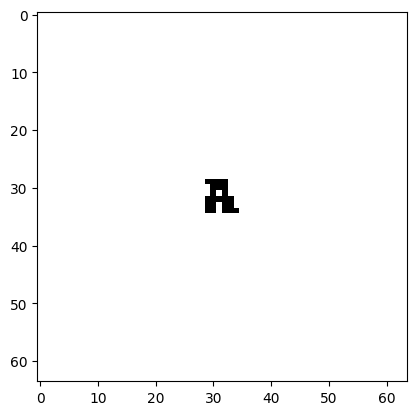

In [102]:
image = cv2.imread('C:/Users/Aravind/try/cat/handwritten_alphabets/A/A.png', cv2.IMREAD_GRAYSCALE)
original_img = plt.imread('C:/Users/Aravind/try/cat/handwritten_alphabets/A/A.png')
plt.imshow(original_img)

In [103]:
original_img.shape

(64, 64, 3)

In [104]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=16, kernel_size=4, input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=32),
    DefaultConv2D(filters=32),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=26, activation="softmax")
])

In [105]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        1

In [106]:
tf.random.set_seed(42)

model.compile(loss="categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(
    dataset,
    epochs=10
)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 313.0215 - accuracy: 0.0769
Epoch 2/10
1/1 [==============================] - 0s 72ms/step - loss: 273.5860 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 81ms/step - loss: 209.4135 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 70ms/step - loss: 88.7033 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 72ms/step - loss: 65.4286 - accuracy: 0.0769
Epoch 6/10
1/1 [==============================] - 0s 78ms/step - loss: 41.6038 - accuracy: 0.0385
Epoch 7/10
1/1 [==============================] - 0s 66ms/step - loss: 3.2581 - accuracy: 0.0385
Epoch 8/10
1/1 [==============================] - 0s 70ms/step - loss: 3.2581 - accuracy: 0.0385
Epoch 9/10
1/1 [==============================] - 0s 69ms/step - loss: 3.2581 - accuracy: 0.0385
Epoch 10/10
1/1 [==============================] - 0s 68ms/step - loss: 3.2581 - accuracy: 0.0385


In [107]:
from PIL import Image

image_path = "C:/Users/Aravind/try/cat/image.png" 
img = Image.open(image_path)

img_resized = img.resize((64, 64), Image.ANTIALIAS)

img_array = np.array(img_resized)

if img_array.shape[2] == 4:
    img_array = img_array[:, :, :3]

resized_image = Image.fromarray(img_array.astype('uint8'))
resized_image.save("resized_image.png") 

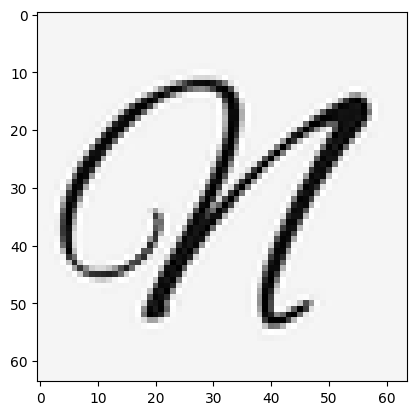

In [108]:
image = cv2.imread('C:/Users/Aravind/try/cat/resized_image.png', cv2.IMREAD_GRAYSCALE)
original_img = plt.imread('C:/Users/Aravind/try/cat/resized_image.png')
plt.imshow(original_img)

In [109]:
image

array([[245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       ...,
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245]], dtype=uint8)

In [110]:
image_path = "C:/Users/Aravind/try/cat/image.png"  
img = Image.open(image_path).convert("RGB")
img = img.resize((64, 64))  
img_array = np.array(img) / 255.0  
img_array = np.expand_dims(img_array, axis=0)

tf.random.set_seed(42)

predictions = model.predict(img_array)

predicted_class_index = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 68ms/step


In [111]:
predicted_class_index

array([20], dtype=int64)